# Data Science Capstone Project:  UCI ML Drug Review Dataset

# Section 1: Business Understanding


## Project Background
The latest advances of technology and big data era brought new business horizons of advertising and promotion within digital platforms of internet, where a network of consumers usually interact with different products, services or other consumers¹. Then, based on  their experience customers share a feedback, regarded as"personalized reviews", on online websites. Nowadays, online reviews have catalyzed the entire marketing campaign replacing the human interactions among users and suppliers with an online forum of opinions, which allows to monitor in real time the quality of a product and the client's satisfaction¹. 
However, in Medicine domain, reviews provided for certain type of drugs are crutial since they can influence the medical condition or harm patient's wellbeing, thus improving the drug quality in this scenario is highly desiderable¹ ². In addition, it is well known the safety of a medical product depends highly on well established clinical protocols, which are carried on under certain experimental conditions within a strict timeline¹. Based on this, aftermarket online reviews can play a very important role as they can improve the overall drug quality by monitoring unexpected drug behaviour not seen before even in the clinical experimentation, which could serve as reference point to increase medication safety and obtain useful summaries of public opinion¹.

## Problem Statement
This project centers on applications of sentiment analysis and predictive modeling making use of online drug reviews as main input¹ ². Thus, the main cornerstone of this analysis is:
* Prediction of emotional inclination (sentiment) given a drug review
* Prediction of medical condition given a drug review

Both of these tasks are quite demanding and challenging which require different strategies to approach each of them. However, before getting into the main point of this analysis, we will perform exploratory data analysis (EDA).

## Library Packages for Data Analysis Manipulation and Machine Learning

In [1]:
#import warnings package
import warnings
warnings.simplefilter('ignore')

#Import wordcloud package
from wordcloud import WordCloud


#Import linear algebra, data manipulation and plot packages
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#import NLP packages
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#import Regex packages
import re

#import sentiment analysis packages
from textblob import TextBlob

#import model selection packages
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay,make_scorer,accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
import itertools
from scipy.sparse import coo_matrix, hstack
from sklearn.pipeline import Pipeline

# Section 2: Exploratory Data Analysis (EDA)
This consists one of the fundamental recipe of any data science project prior to the kick-off of data analysis.

## Access Data

In [2]:
#import patient's drug reviews dataset of UCI's ML data platform
df=pd.read_csv('drugsCom_all_data.csv')
#number of patient's drug reviews
drugs_reviews_number=df.shape[0]
#number of patient's related medical conditions to drug reviews
condition_number=df['condition'].nunique()
#number of unique drugs names taken by the patients
drugName_number=df['drugName'].nunique()

print('Dataset contains information about {} drug reviews that are related to {} medical conditions and {} unique drug names'.format(drugs_reviews_number,condition_number,drugName_number))
print('The drug reviews dataset contains {} columns'.format(df.shape[1]))
#print first 5 rows of listings dataset                                                                                          #hosts_number))
df.head()

Dataset contains information about 215063 drug reviews that are related to 916 medical conditions and 3671 unique drug names
The drug reviews dataset contains 8 columns


Unnamed: 0  uniqueID                  drugName  \
0           0    206461                 Valsartan   
1           1     95260                Guanfacine   
2           2     92703                    Lybrel   
3           3    138000                Ortho Evra   
4           4     35696  Buprenorphine / naloxone   

                      condition  \
0  Left Ventricular Dysfunction   
1                          ADHD   
2                 Birth Control   
3                 Birth Control   
4             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

A brief description of dataset's columns:
- drugName (categorical): patient's drug name
- condition (categorical): patient's disease condition
- review (text): patient's drug review
- rating (numerical): patient's rating out of 10 
- date (date): date of review entry
- usefulCount (numeric): number of users who found review useful
Data represent unique ID's patient records that purchased a drug that meets a specific disease condition and contain a review and rating for the drug on the purchase date

## Missing Values in Drugs Review Dataset

In [3]:
#Custom function for producing a barplot with % of missing values of a dataframe
def barplot_missing(df_missing,width_barplot,height_barplot,width_bars,fontsize_annotations,fontsize_ylab,fontsize_xlab,fontsize_title,fontsize_xticks,fontsize_yticks,Text):  
    '''
    returns a barplot object with % Missing of all columns contained in df_missing
    
    input: 
           df_missing: dataframe with missing values
           width_barplot: width of barplot figure
           height_barplot: height of barplot figure
           width_bars: width of bars
           fontsize_annotations: size of annotated labels of values
           fontsize_ylab: size of ylab
           fontsize_xlab: size of xlab
           fontsize_title: size of main title of barplot
           fontsize_xticks: size of xticks
           fontsize_yticks: size of yticks
           dataset:
    output:
           my_barplot: barplot object with % Missing of all columns contained in df_missing
    '''
    
    ###preprossesing of df_missing part
    
    #find percentage of missing values for each column of df_missing and round them to 1 digit
    df_missing= round(df_missing.isnull().mean()*100,1)
    
    #sort df_missing in descending order over the values
    df_missing.sort_values(ascending=False,inplace=True)
    
    #Set up a control flow in case of columns with missing or without missing 
    if(sum(df_missing[df_missing > 0])>=1):
        
        #in case of columns with missing, filter only for columns with missing values, all the rest are excluded
        df_missing=df_missing[df_missing > 0]
    
    else:
        #in case of complete columns without missing leave the missing_df to its initial form
        df_missing=df_missing
    
    ###barplot part 

    #set barplot figure size with given (width_barplot, height_barplot)
    plt.rcParams["figure.figsize"] = (width_barplot,height_barplot)
    
    #set barplot object to my_barplot 
    my_barplot=df_missing.plot.bar(width_bars)
    
    #set value annotations to print it on the barplot
    plt.bar_label(my_barplot.containers[0],fontsize=fontsize_annotations)
    
    #set ylabel
    plt.ylabel("% Missing",fontsize=fontsize_ylab)
    
    #set xlabel
    plt.xlabel("Variables",fontsize=fontsize_ylab)
    
    #set the main title
    plt.title("Percentage of missing values per variable in "+Text,loc='left',fontsize=fontsize_title)
    
    #set xticks rotated by 45 degrees to the right
    plt.xticks(rotation=45, ha="right",fontsize=fontsize_xticks)
    
    #set yticks
    plt.yticks(fontsize=fontsize_yticks)
    
    return my_barplot  

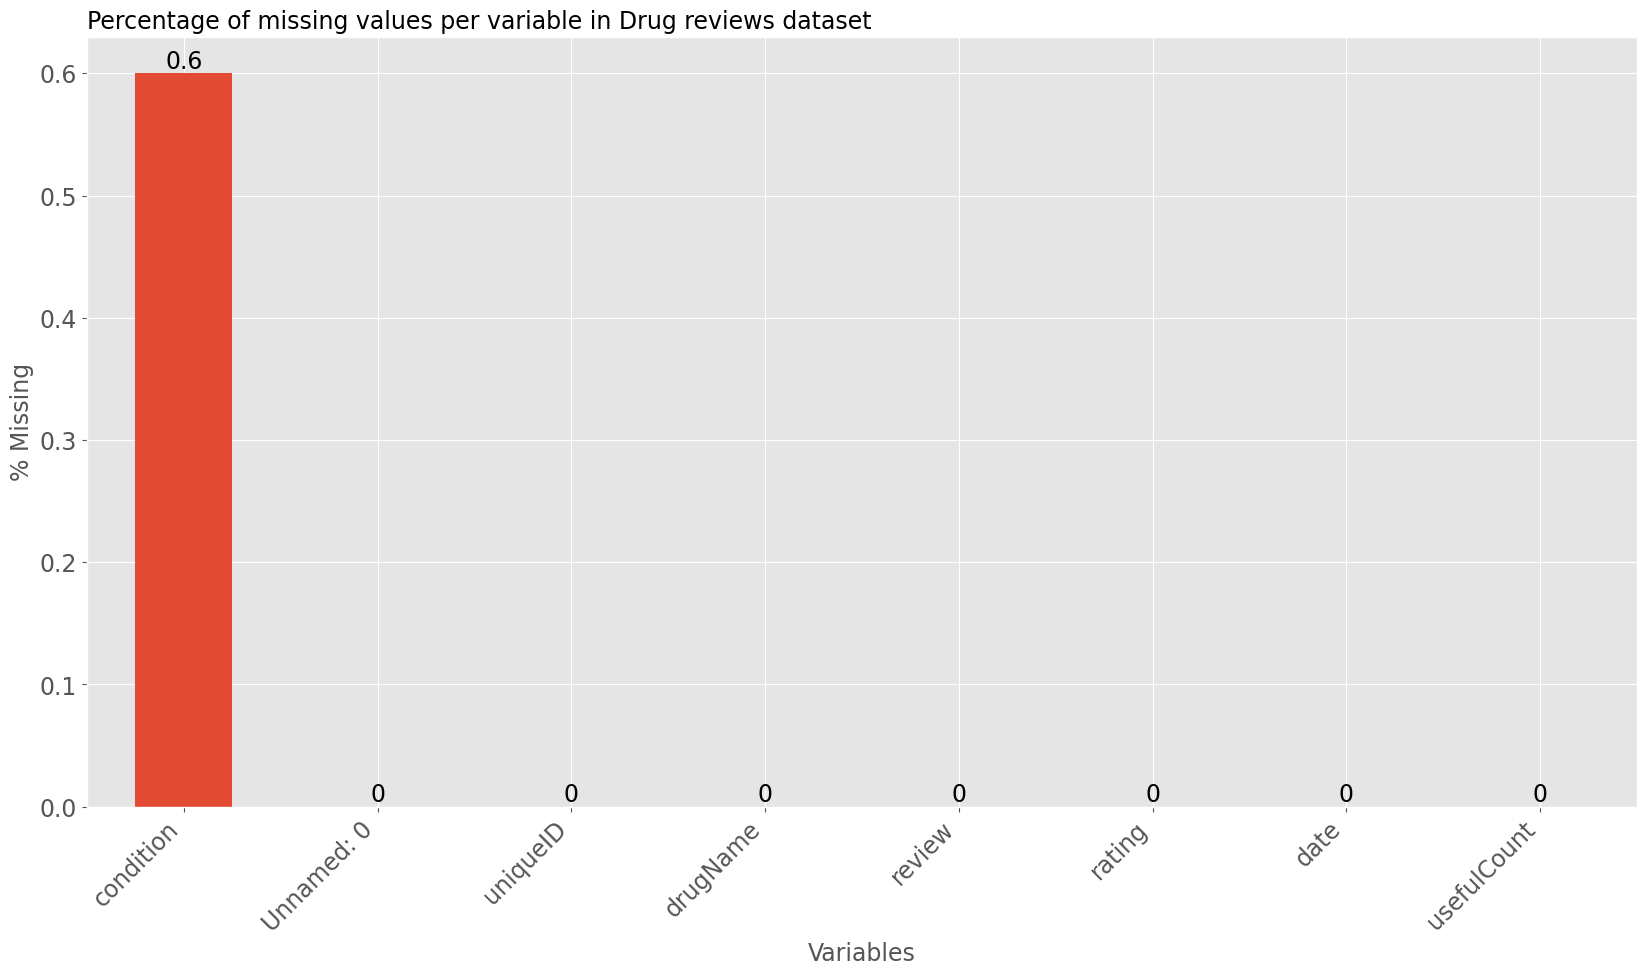

In [4]:
#barplot for % missing values of drug reviews dataset applying the custom function barplot_missing(.)
barplot_missing=barplot_missing(df_missing=df,width_barplot=20,height_barplot=10,width_bars=0.4,fontsize_annotations=17,fontsize_ylab=17,fontsize_xlab=17,fontsize_title=17,fontsize_xticks=17,fontsize_yticks=17,Text="Drug reviews dataset")

From the above we observe that disease condition is missed only at 0.6% which is a negligible amount of information and can be safely removed, whereas the rest of the columns have complete information, thus the condition column deserves more exploration.

## Medical Condition 

In [5]:
#frequency of medical conditions based on drugs reviews
cond=df['condition'].value_counts().reset_index()
#rename columns
cond.columns=['Medical Conditions','Frequency']
#set row index medical conditions 
cond.set_index('Medical Conditions',inplace=True)
print(tabulate(cond, headers=["Medical Condition","Frequency"], tablefmt='fancy_grid',showindex='always'))
#Number of different medical conditions
number_cond=len(cond.index)

╒═════════════════════════════════════════════════════════════════════╤═════════════╕
│ Medical Condition                                                   │   Frequency │
╞═════════════════════════════════════════════════════════════════════╪═════════════╡
│ Birth Control                                                       │       38436 │
├─────────────────────────────────────────────────────────────────────┼─────────────┤
│ Depression                                                          │       12164 │
├─────────────────────────────────────────────────────────────────────┼─────────────┤
│ Pain                                                                │        8245 │
├─────────────────────────────────────────────────────────────────────┼─────────────┤
│ Anxiety                                                             │        7812 │
├─────────────────────────────────────────────────────────────────────┼─────────────┤
│ Acne                                                

In [6]:
print('There are {} different medical conditions associated with {} patients'.format(number_cond,df.shape[0]))

There are 916 different medical conditions associated with 215063 patients


However, for simplicity purposes, we will rather focus on top 10 frequent medical conditions as the following plot suggests

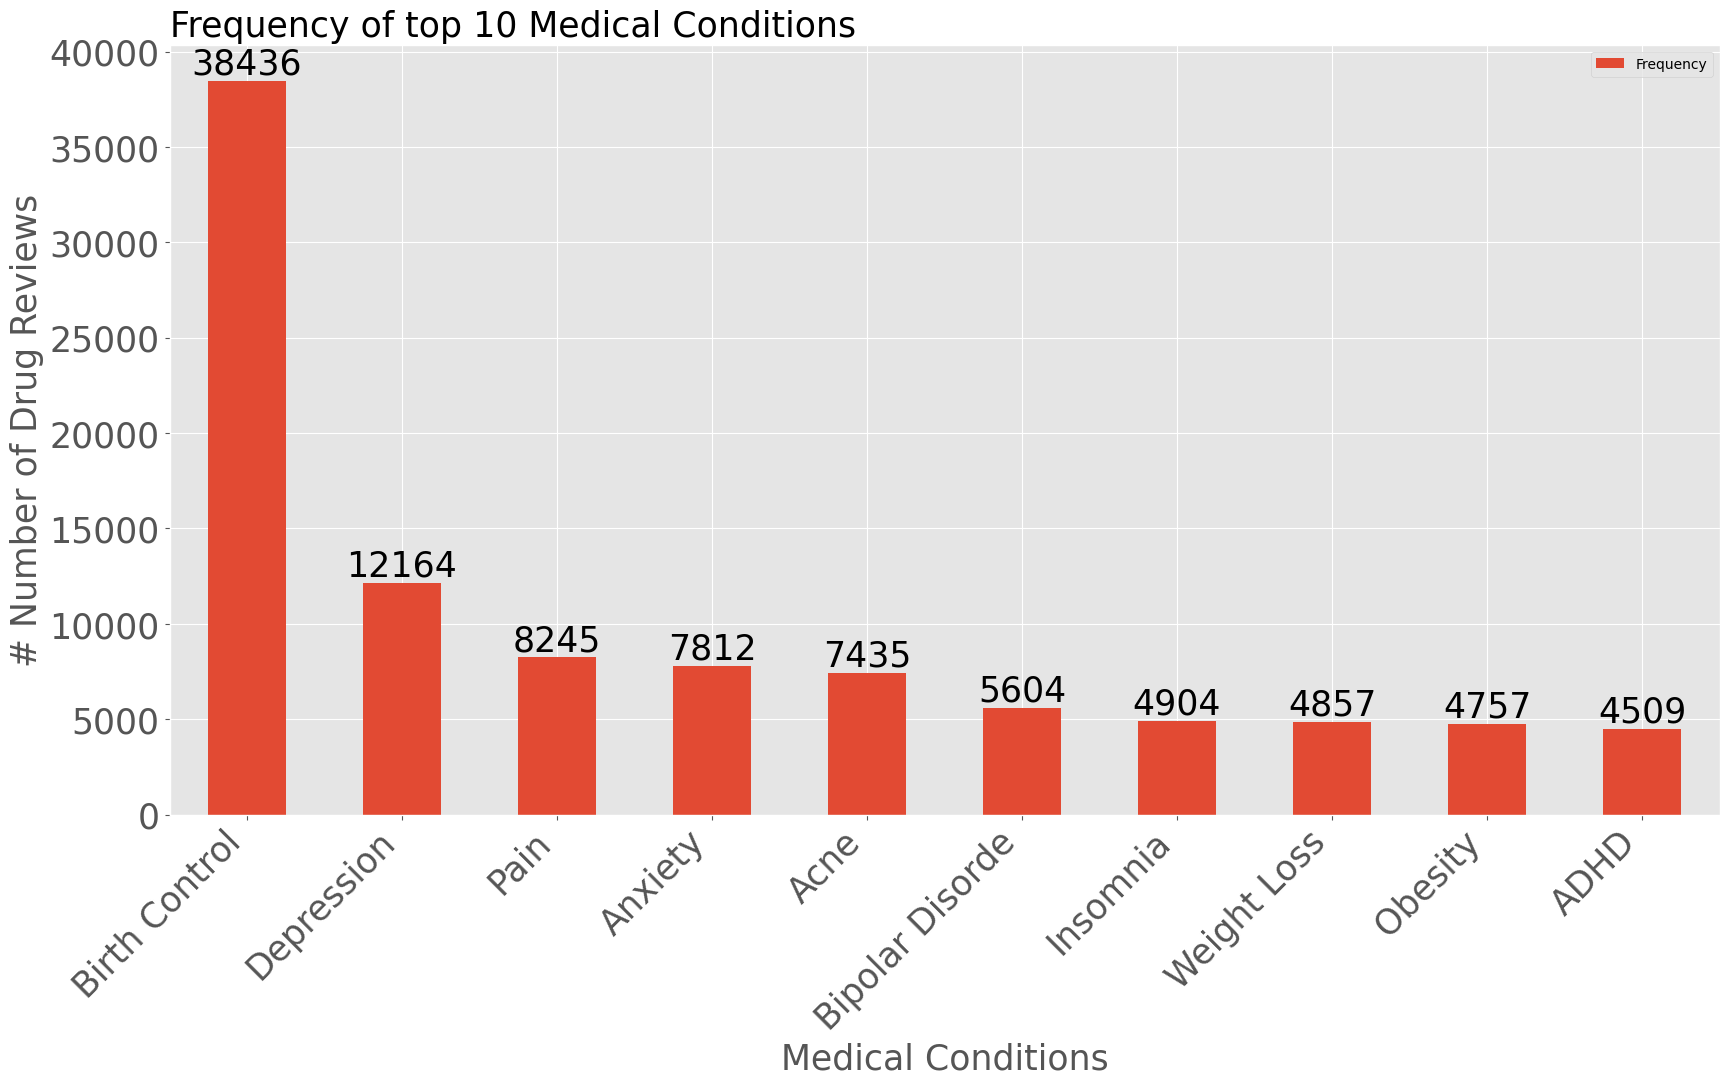

In [7]:
barplot_cond_top10=cond.head(10).plot.bar()
#set value annotations to print it on the barplot
plt.bar_label(barplot_cond_top10.containers[0],fontsize=25)    
#set ylabel
plt.ylabel("# Number of Drug Reviews",fontsize=25)
#set xlabel
plt.xlabel("Medical Conditions",fontsize=25)    
#set the main title
plt.title("Frequency of top 10 Medical Conditions",loc='left',fontsize=25)
#set xticks rotated by 45 degrees to the right
plt.xticks(rotation=45, ha="right",fontsize=25)
#set yticks
plt.yticks(fontsize=25)
#number of patients reviews
patient_reviews_top10=cond.head(10).sum()[0]

In [8]:
print('From the above we notice that the most frequent condition disease is birth control followed by depression, pain and so on, thus our main analysis will be based on these top 10 frequent symptoms based on {} patients drug reviews'.format(patient_reviews_top10))

From the above we notice that the most frequent condition disease is birth control followed by depression, pain and so on, thus our main analysis will be based on these top 10 frequent symptoms based on 98723 patients drug reviews


In addition, we observe errors inside condition disease column where some categories are probably wrong or incomplete such as the following which are mainly due to web scraping observing the HTML tags (e.g </span>), thus will be removed for the purposes in the next steps of the analysis

In [9]:
#Print the medical condition
cond_err=df.dropna()[df.dropna()['condition'].str.contains('</span>')]['condition'].value_counts().reset_index()
#rename columns
cond_err.columns=['Medical Conditions','Frequency']
#set row index medical conditions 
cond_err.set_index('Medical Conditions',inplace=True)
print(tabulate(cond_err, headers=["Medical Condition","Frequency"], tablefmt='fancy_grid',showindex='always'))

╒══════════════════════════════════════════════╤═════════════╕
│ Medical Condition                            │   Frequency │
╞══════════════════════════════════════════════╪═════════════╡
│ 0</span> users found this comment helpful.   │         128 │
├──────────────────────────────────────────────┼─────────────┤
│ 1</span> users found this comment helpful.   │         114 │
├──────────────────────────────────────────────┼─────────────┤
│ 2</span> users found this comment helpful.   │         105 │
├──────────────────────────────────────────────┼─────────────┤
│ 3</span> users found this comment helpful.   │         101 │
├──────────────────────────────────────────────┼─────────────┤
│ 4</span> users found this comment helpful.   │          87 │
├──────────────────────────────────────────────┼─────────────┤
│ 6</span> users found this comment helpful.   │          64 │
├──────────────────────────────────────────────┼─────────────┤
│ 5</span> users found this comment helpful.   │       

In [10]:
#Number of Patient's reviews for only error medical conditions
number_reviews_cond_err=cond_err.sum()[0]
#Number of unique erroneous medical conditions
number_cond_err=len(cond_err.index)
print('There are {} Erroneous or incomplete medical conditions that contain about {} patients drug reviews'.format(number_cond_err,number_reviews_cond_err))

There are 80 Erroneous or incomplete medical conditions that contain about 1171 patients drug reviews


## Drug Names

In [11]:
#Print the all the drugs name
drug=df['drugName'].value_counts().reset_index()
#rename columns
drug.columns=['Drugs','Frequency']
#set row index drugs name
drug.set_index('Drugs',inplace=True)
print(tabulate(drug, headers=["Drug Name","Frequency"], tablefmt='fancy_grid',showindex='always'))
#Number of Patient's reviews 
number_reviews_drug=drug.sum()[0]
#unique number of drug names 
number_unique_drug=df['drugName'].nunique()

╒══════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════╕
│ Drug Name                                                                                        │   Frequency │
╞══════════════════════════════════════════════════════════════════════════════════════════════════╪═════════════╡
│ Levonorgestrel                                                                                   │        4930 │
├──────────────────────────────────────────────────────────────────────────────────────────────────┼─────────────┤
│ Etonogestrel                                                                                     │        4421 │
├──────────────────────────────────────────────────────────────────────────────────────────────────┼─────────────┤
│ Ethinyl estradiol / norethindrone                                                                │        3753 │
├───────────────────────────────────────────────────────────────────────────────

In [12]:
print('There are {} unique drugs names among {} patients.'.format(number_unique_drug,number_reviews_drug))

There are 3671 unique drugs names among 215063 patients.


In addition, we can visualize the top 25 popular drugs based on 215063 patient reviews.

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000')])

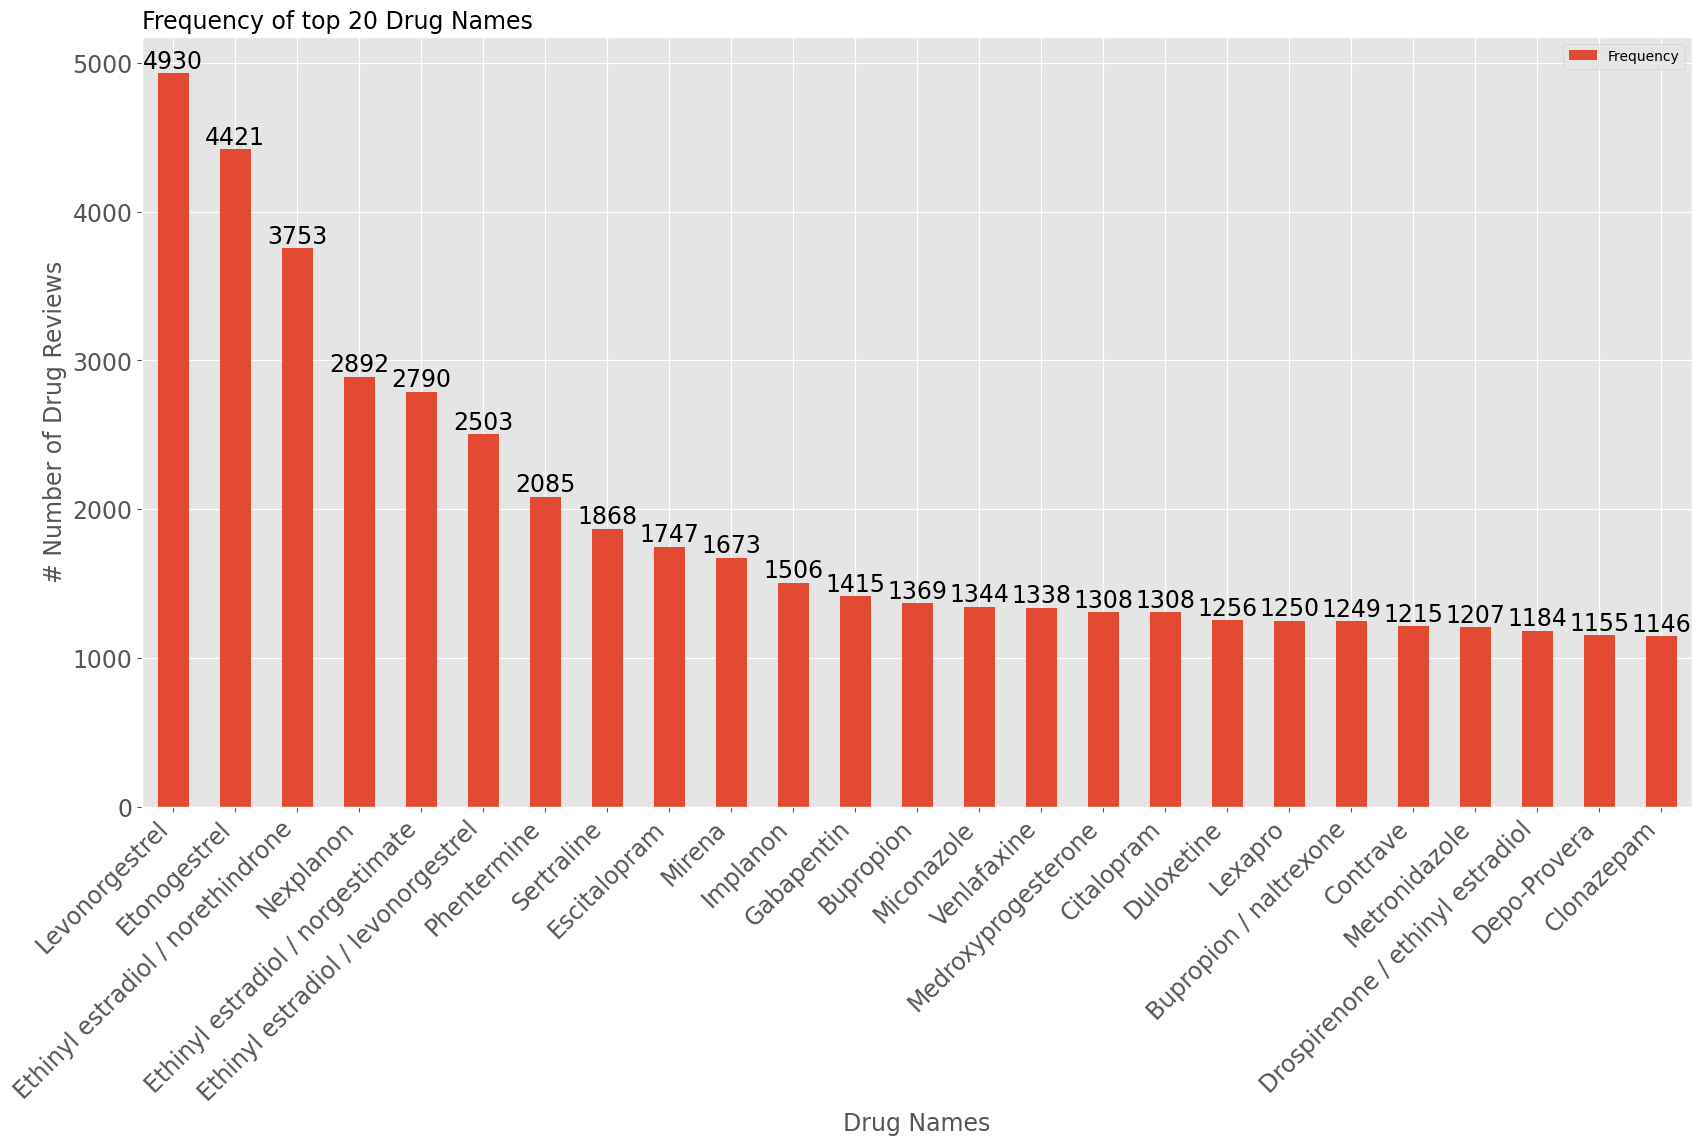

In [13]:
barplot_drug_top20=drug.head(25).plot.bar()
#set value annotations to print it on the barplot
plt.bar_label(barplot_drug_top20.containers[0],fontsize=17)    
#set ylabel
plt.ylabel("# Number of Drug Reviews",fontsize=17)
#set xlabel
plt.xlabel("Drug Names",fontsize=17)    
#set the main title
plt.title("Frequency of top 20 Drug Names",loc='left',fontsize=17)
#set xticks rotated by 45 degrees to the right
plt.xticks(rotation=45, ha="right",fontsize=17)
#set yticks
plt.yticks(fontsize=17)

From the above we notice that the 3 top most popular drugs are Levenorgestrel, Etonogestrel and Ethinyl estradio/norethindrone with the first one makes one the difference based on 4930 drug reviews and these 3 drugs are ruling the top against the rest of the drugs.

## Drug Ratings

In [14]:
print(tabulate(pd.DataFrame(pd.DataFrame(df['rating'].describe())[1:]), headers=["Drug Ratings","Descriptive Statistics"], tablefmt='fancy_grid',showindex='always'))

╒════════════════╤══════════════════════════╕
│ Drug Ratings   │   Descriptive Statistics │
╞════════════════╪══════════════════════════╡
│ mean           │                  6.99001 │
├────────────────┼──────────────────────────┤
│ std            │                  3.27555 │
├────────────────┼──────────────────────────┤
│ min            │                  1       │
├────────────────┼──────────────────────────┤
│ 25%            │                  5       │
├────────────────┼──────────────────────────┤
│ 50%            │                  8       │
├────────────────┼──────────────────────────┤
│ 75%            │                 10       │
├────────────────┼──────────────────────────┤
│ max            │                 10       │
╘════════════════╧══════════════════════════╛


Having a quick look to summary statistics of drug ratings we observe that the average drug rating across 215063 patient's drug reviews was found approximately 7 with a relative high standard deviation of 3.27 which is normal due to the spread of the data. However, the data seems to be highly asymmetric due to the large standard deviation and in this case the median equal to 8 is more representative.

In addition, a visualization of drugs ratings will also validate the fact that the distribion is highly asymmetric as the following does

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000'),
  Text(0, 70000.0, '70000'),
  Text(0, 80000.0, '80000')])

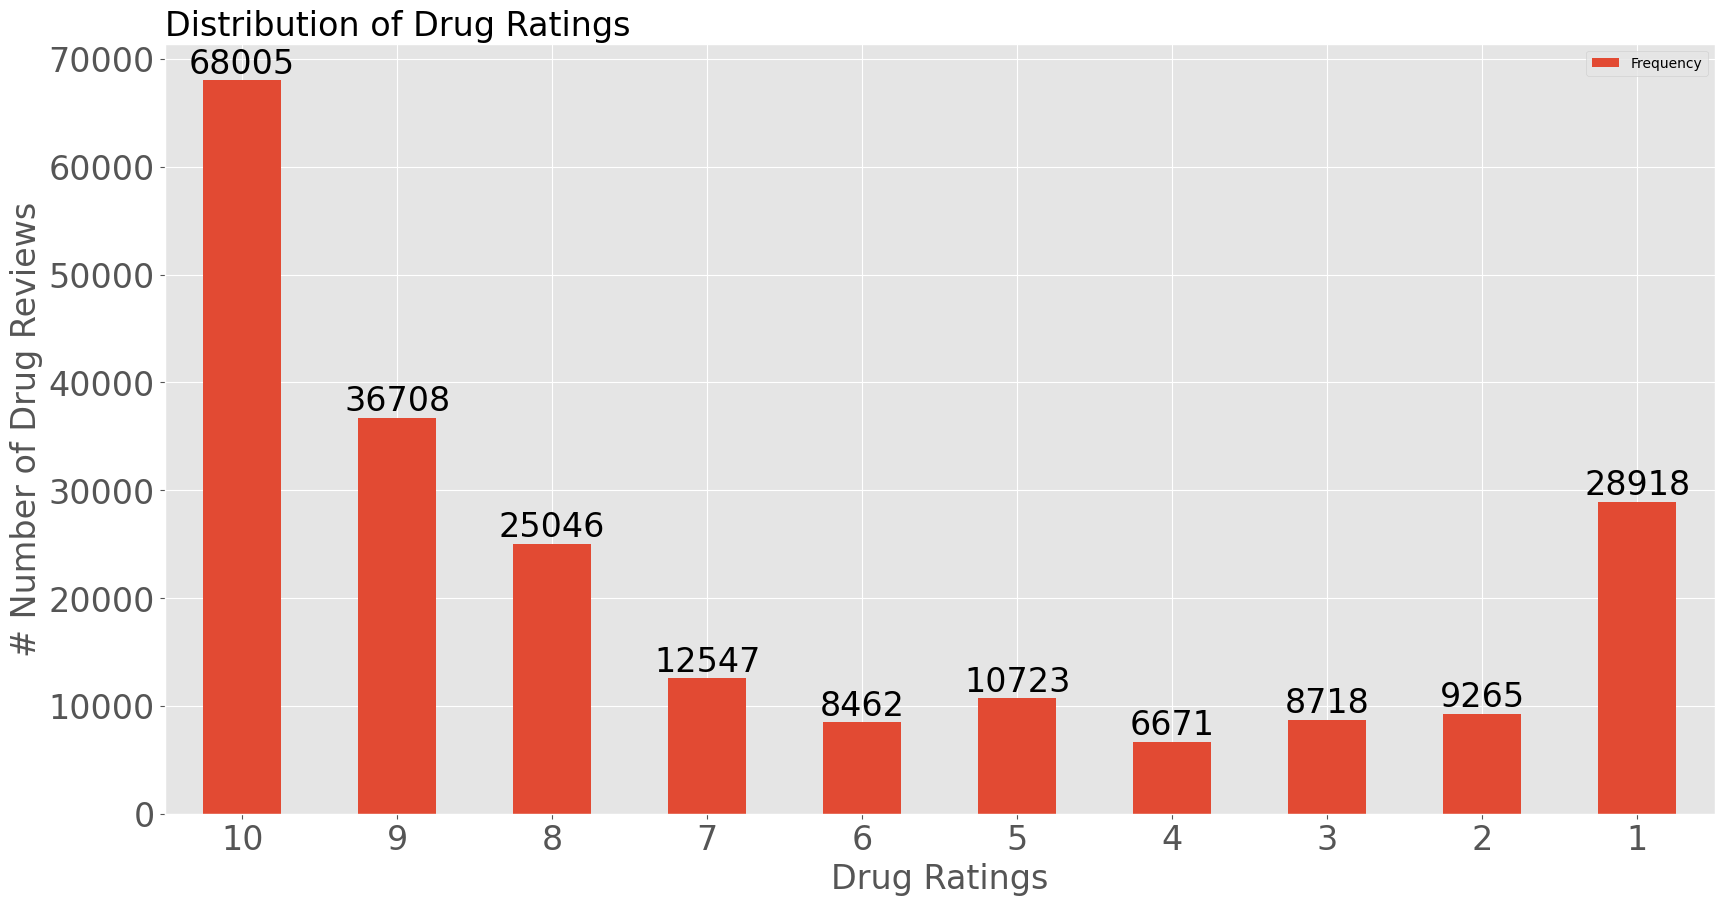

In [15]:
#Print drugs ratings
drug_ratings=df['rating'].value_counts().reset_index().sort_values(by='index',ascending=False)
#rename columns
drug_ratings.columns=['Drug Rating','Frequency']
#set row index drugs name
drug_ratings.set_index('Drug Rating',inplace=True)
barplot_drug_ratings=drug_ratings.plot.bar()
#set value annotations to print it on the barplot
plt.bar_label(barplot_drug_ratings.containers[0],fontsize=24)    
#set ylabel
plt.ylabel("# Number of Drug Reviews",fontsize=24)
#set xlabel
plt.xlabel("Drug Ratings",fontsize=24)    
#set the main title
plt.title("Distribution of Drug Ratings",loc='left',fontsize=24)
#set xticks rotated by 45 degrees to the right
plt.xticks(rotation=0, ha="center",fontsize=24)
#set yticks
plt.yticks(fontsize=24)

From the above we observe that higher drug ratings were associated with high number of drug reviews which make's sense at all since the drug's better quality gives higher ratings, this is also related to the asymmetry of the distribution where only the higher ratings are highly populated. 

## Number of Drugs per Medical Condition

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

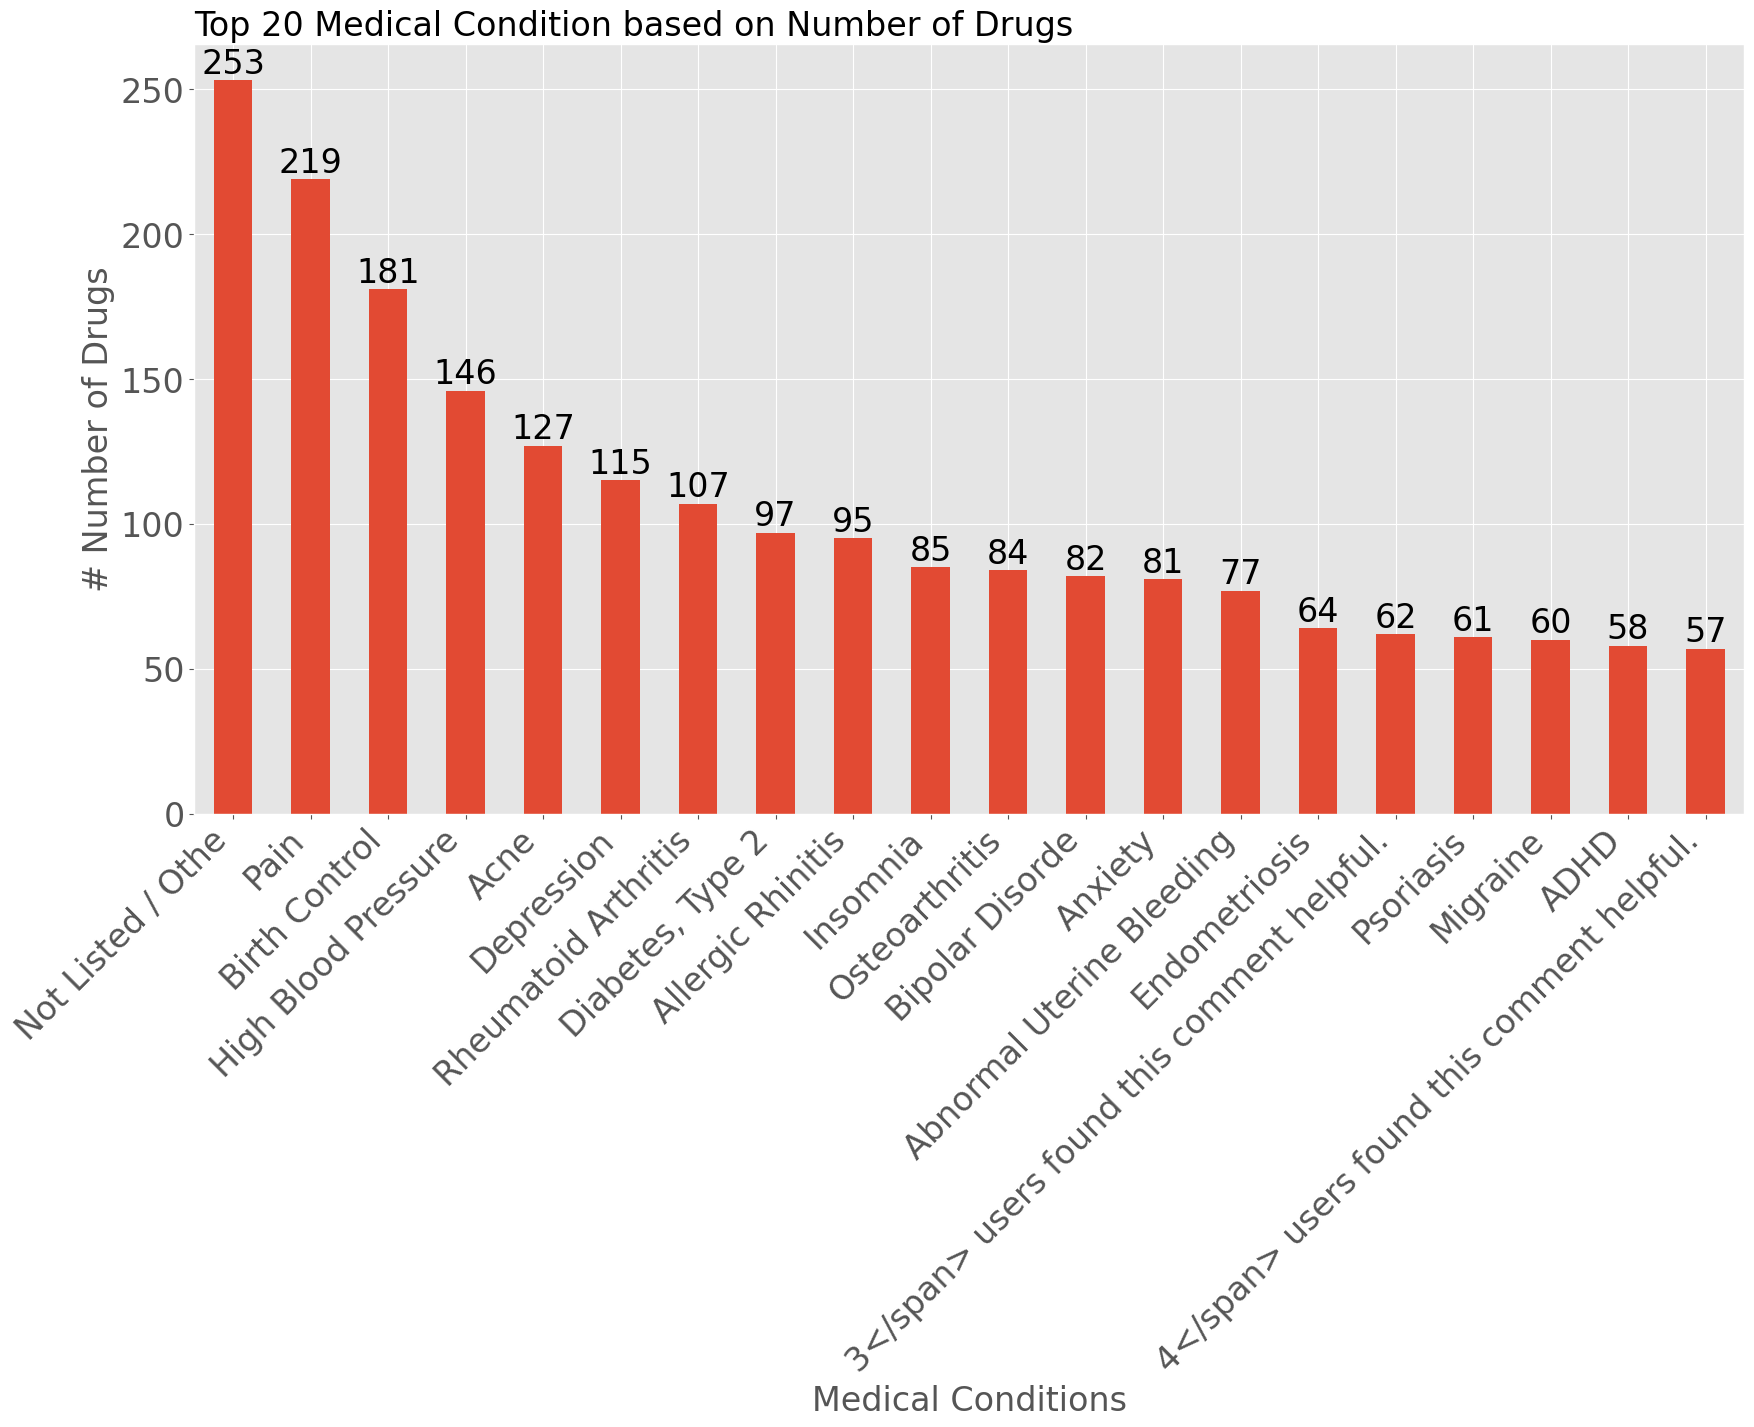

In [16]:
barplot_drugnumber_cond_top20=df.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(20).plot.bar()
#set value annotations to print it on the barplot
plt.bar_label(barplot_drugnumber_cond_top20.containers[0],fontsize=24)    
#set ylabel
plt.ylabel("# Number of Drugs",fontsize=24)
#set xlabel
plt.xlabel("Medical Conditions",fontsize=24)    
#set the main title
plt.title("Top 20 Medical Condition based on Number of Drugs",loc='left',fontsize=24)
#set xticks rotated by 45 degrees to the right
plt.xticks(rotation=45, ha="right",fontsize=24)
#set yticks
plt.yticks(fontsize=24)

From the above we notice that the most frequent disease condition based on the number of used drugs is Not Listed/ Othe with 253 drugs which seem to be incorect. As we already mentioned previously, disease conditions column contains wrong or incomplete values which is the same case likewise here for Not Listed/ Othe, the same holds also for 3<#span>.... and 4<#span>.... for which we already mentioned prevously and will not be considered in the main analysis. Based on these, Pain has the highest number of used drugs equal to 219 and then follows birth control, and high blood pressure respectively with 181 and 146 total drugs respectively which is not a suprise since these appear frequently in ordinary life and are associated usually with a larger variety of drugs. 

## Total Drug Ratings per Drug Name

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]),
 [Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000'),
  Text(0, 30000.0, '30000'),
  Text(0, 35000.0, '35000'),
  Text(0, 40000.0, '40000')])

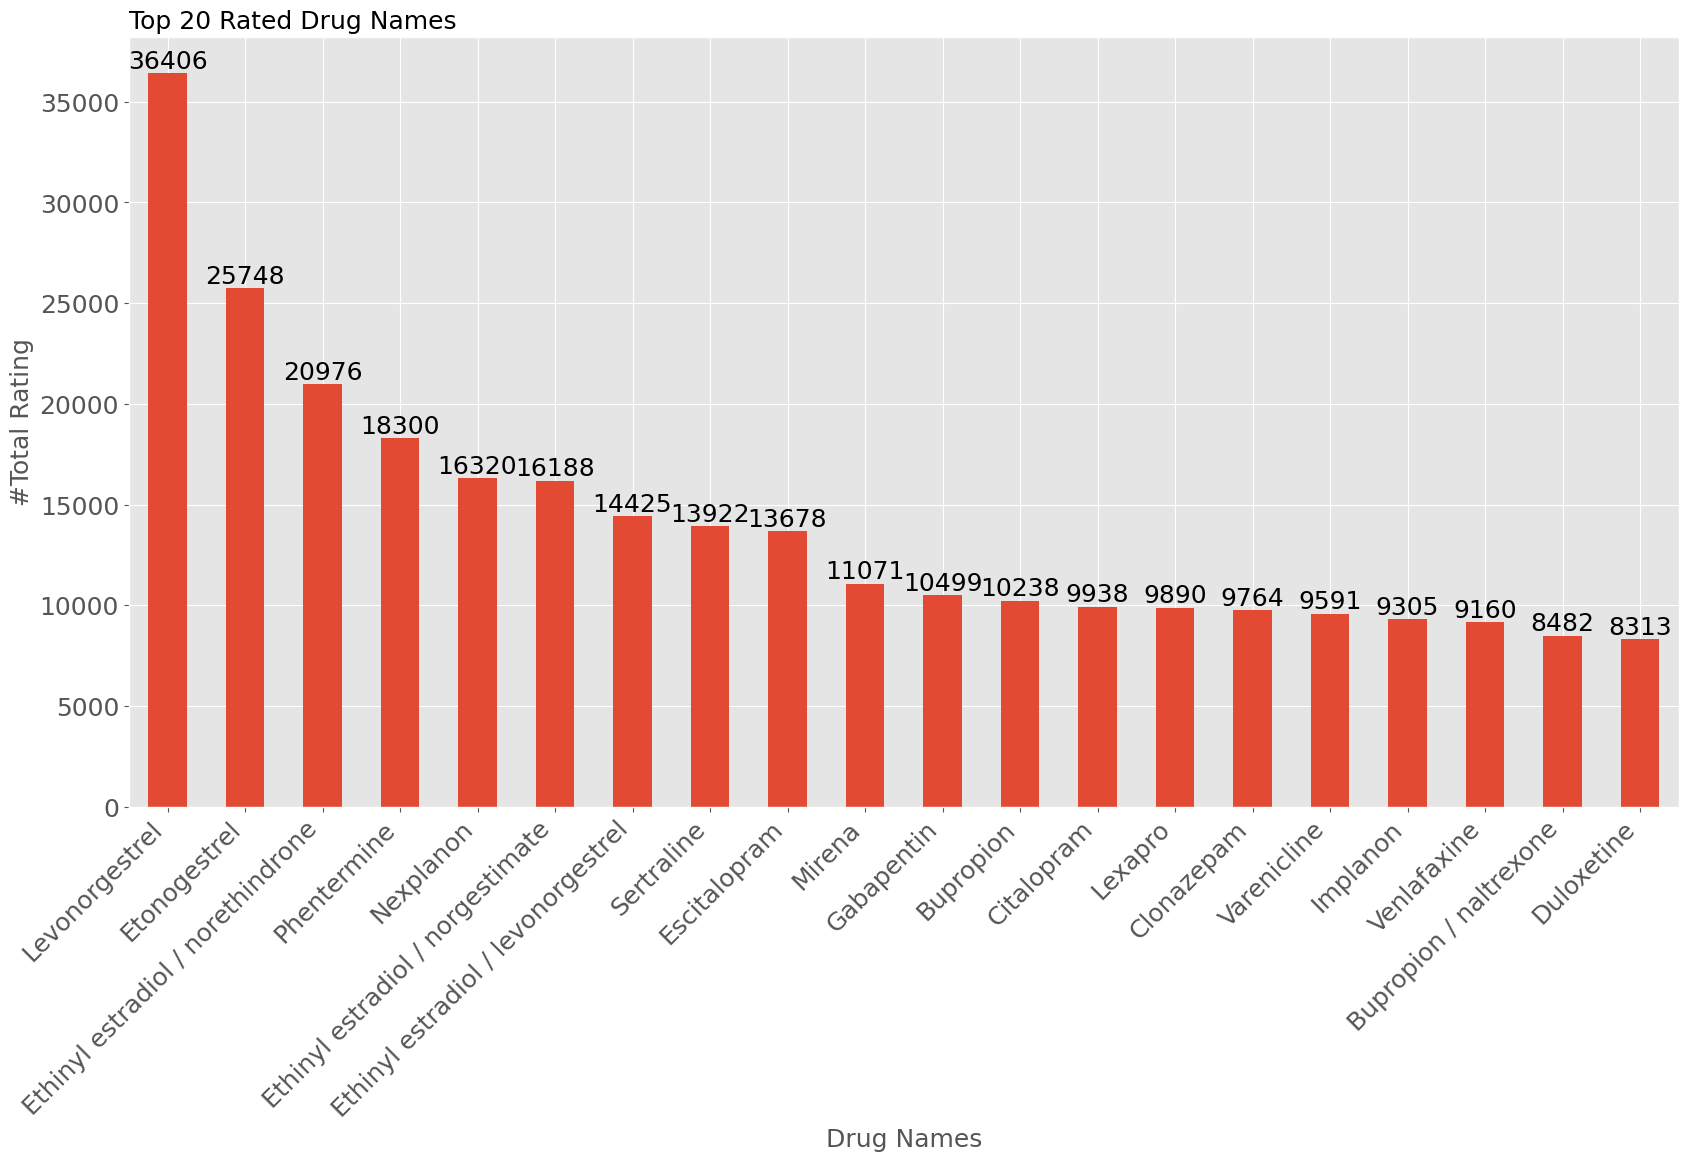

In [17]:
barplot_totalrating_drug_top20=df.groupby('drugName')['rating'].sum().sort_values(ascending=False).head(20).plot.bar()
#set value annotations to print it on the barplot
plt.bar_label(barplot_totalrating_drug_top20.containers[0],fontsize=18)    
#set ylabel
plt.ylabel("#Total Rating",fontsize=18)
#set xlabel
plt.xlabel("Drug Names",fontsize=18)    
#set the main title
plt.title("Top 20 Rated Drug Names",loc='left',fontsize=18)
#set xticks rotated by 45 degrees to the right
plt.xticks(rotation=45, ha="right",fontsize=18)
#set yticks
plt.yticks(fontsize=18)

From the above we notice that the top rated drug name is Levonorgestrel with a total of 36406 followed by Etonogestrel and Ethinyl Estadiol/Norethindrome marking as well as 25748 and 20967 total ratings respectively among the top 20 rated drugs. Thus, it seems to exist an association between drug name and drug rating.

## Data Preprocessing of Drug Reviews

In General, any form of raw textual data cannot be understand by machine learning algorithms, thus it is highly recommended that text input must be cleaned, reshaped and tranformed into a flexible numeric format before it is fed into any machine learning model. Therefore, online drug reviews are preprocessed by removing any punctuations, stopwords and subsetting only alphanumerical characters based on the below function of sentiment_analysis_preprocessing

In [18]:
#initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [19]:
#data text preprocessing fuction for raw text
def text_preprocessing(raw_text):
    '''
    input:
           raw_text: raw text input (Pandas Series with string values) 
           
    output:
           cleansed_text: cleansed raw text input (Pandas Series with string values)
    '''
    #remove punctuations
    processed_text=[word for word in raw_text if word not in string.punctuation]
    #rejoins text the splitted list maintaining the spaces from the removed punctuations
    processed_text=''.join(processed_text)
    #get rid of stopwords
    processed_text=[lemmatizer.lemmatize(word).lower() for word in processed_text.split() if word.lower() not in stopwords.words('english')]
    #subset only alphanumeric characters
    cleansed_text=[word for word in processed_text if word.isalpha()]
    return cleansed_text

Based on the above text_preprocessing function we can apply it row-wise on online drug reviews of dataframe df and save the output as a column of dataframe df with name reviews preprocessed

In [20]:
df['review_preprocessed']=df['review'].apply(text_preprocessing)

rejoin each word rowisely to form the review_preprocessed

In [21]:
df['review_preprocessed']=df['review_preprocessed'].apply(lambda row: ' '.join(row))

## Sentiment Analysis

This step concerns mainly the latent computation of emotional inclination of drug reviews which will serve as a primary output in order to conduct the first task of predictive modeling. Thus, using the below sentiment_analysis_preprocessing function:

In [22]:
#function for sentiment analysis preprocessing
def sentiment_analysis_preprocessing(df,text_col):
    '''
    input:
          df: pandas dataframe
          text_col: name of text column in df
          
    output:
          df: pandas* dataframe with additional columns (e.g polarity)
    '''
  
    #Create a function to get polarity
    def get_polarity(raw_text):
        '''
        input:
              raw_text: raw text input
          
        output:
              polarity_score: polarity score produced with TextBlob
        '''

        polarity_score=TextBlob(raw_text).sentiment.polarity
   
        return polarity_score
  
    #Add polarity column within df using get_polarity() functions
    df['polarity_score'] = df[text_col].apply(lambda row: get_polarity(row.__str__()))
    
    #Outcome of sentiment based on polarity score
    def get_analysis(polarity_score):
        '''
        input:
              score: subjectivity score
          
        output:
              sentiment: a pandas series with strings of sentiment outcome (e.g positive, neutral,negative) 
        '''

        if polarity_score > 0:  
            return 'positive'
        elif polarity_score == 0:
            return 'neutral'
    
        else:
            return 'negative'
    df['sentiment'] =df['polarity_score'].apply(lambda row: get_analysis(row))
    return df

We can construct the emotional inclination of drug reviews based on sentiment_analysis_preprocessing function using as inputs, the dataframe df and column review_preprocessed as follows:

In [23]:
df=sentiment_analysis_preprocessing(df=df,text_col='review_preprocessed')

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]),
 [Text(0, 0.0, '0'),
  Text(0, 20000.0, '20000'),
  Text(0, 40000.0, '40000'),
  Text(0, 60000.0, '60000'),
  Text(0, 80000.0, '80000'),
  Text(0, 100000.0, '100000'),
  Text(0, 120000.0, '120000'),
  Text(0, 140000.0, '140000')])

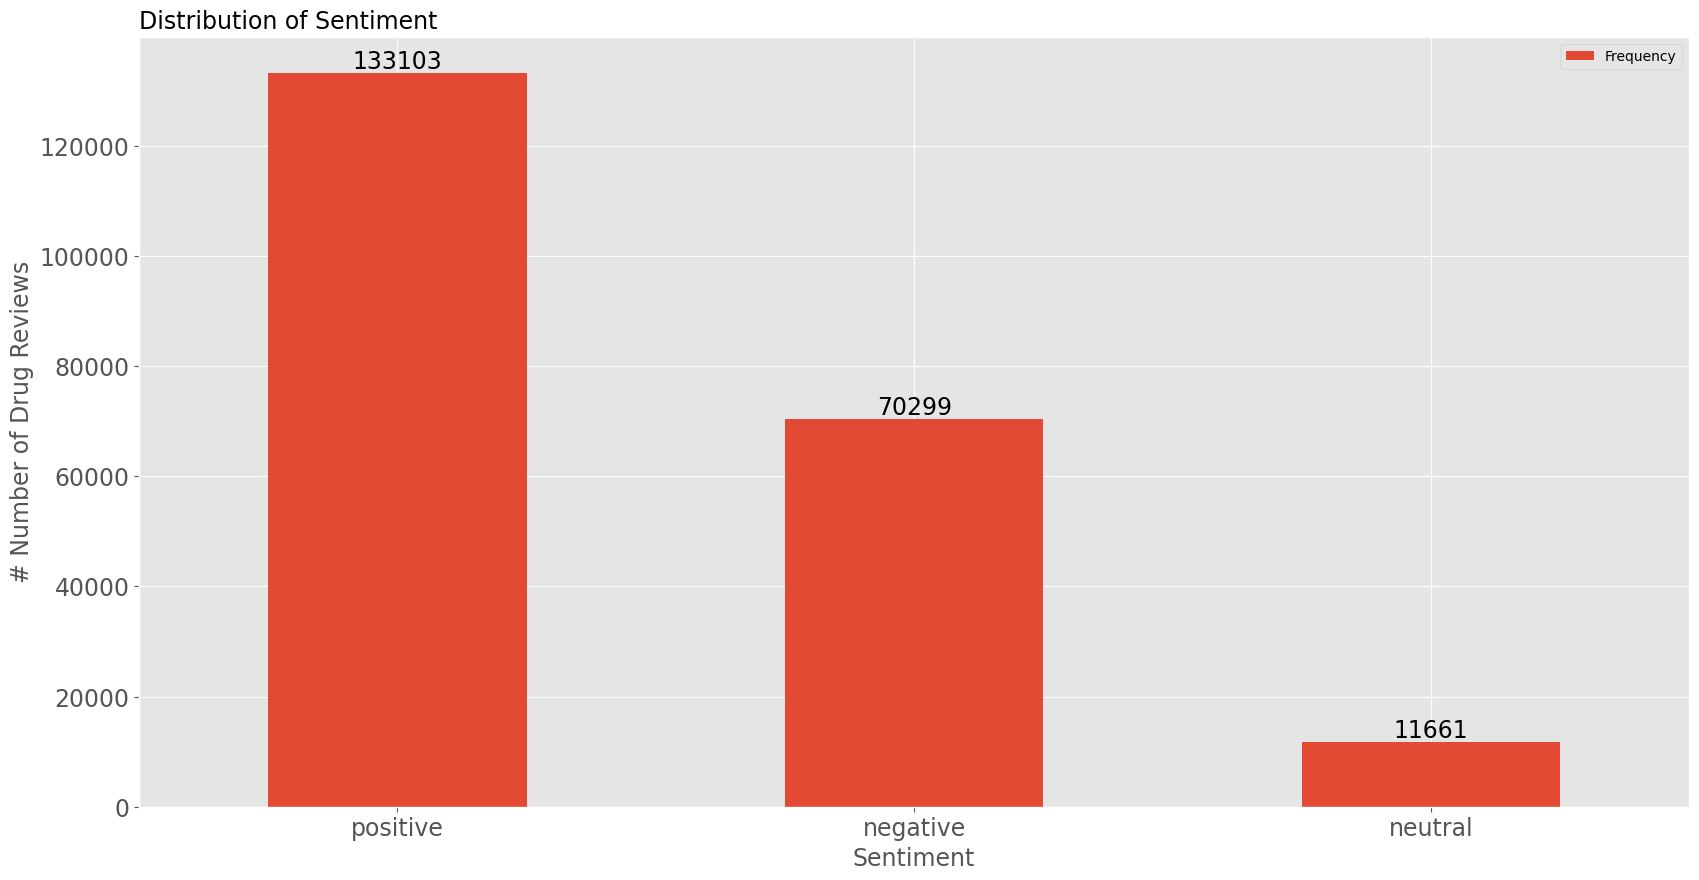

In [24]:
#print drugs ratings
sentiment=df['sentiment'].value_counts().reset_index().sort_values(by='sentiment',ascending=False)
#rename columns
sentiment.columns=['Sentiment','Frequency']
#set row index sentiments names
sentiment.set_index('Sentiment',inplace=True)
barplot_sentiment=sentiment.plot.bar()
#set value annotations to print it on the barplot
plt.bar_label(barplot_sentiment.containers[0],fontsize=17)    
#set ylabel
plt.ylabel("# Number of Drug Reviews",fontsize=17)
#set xlabel
plt.xlabel("Sentiment",fontsize=17)    
#set the main title
plt.title("Distribution of Sentiment",loc='left',fontsize=17)
#set xticks rotated by 45 degrees to the right
plt.xticks(rotation=0, ha="center",fontsize=17)
#set yticks
plt.yticks(fontsize=17)

From the above we notice that the majority of drug reviews 133103 are positive and 70299 are negative, whereas there is also a small subset of 11661 drug reviews being neutral which will not be considered in the final analysis.

In [25]:
#exclude neutral sentiments
df=df[df['sentiment']!='neutral']

In addition, the sentiment must be turned into numeric type in order to be understood by Machine Learning models as showing below

In [26]:
#sentiment encoding positive=1 and negative=0
df['sentiment'] = np.where(df['sentiment'] == "positive", 1, 0)

## Data Filtering

As we already mentioned previously, the final analysis of this project will be based on 10 most frequent medical conditions excluding the neutral drug reviews, thus dataframe (df2) will contain 94960 rows.

In [27]:
#Filter only for data of top 10 frequent medical conditions
df2=df[(df['condition'].isin(cond.head(10).index.tolist()))]

In [28]:
#rows of df2
df2.shape[0]

94960

notice above that this dataframe df2 contains 94960 drug reviews

## Positive Reviews

In [29]:
#filter only for positive reviews
df_pos_review=df2[df2['sentiment']==1]

In [30]:
#concatenate the review_preprocessed
pos_review=' '.join(df_pos_review['review_preprocessed'])

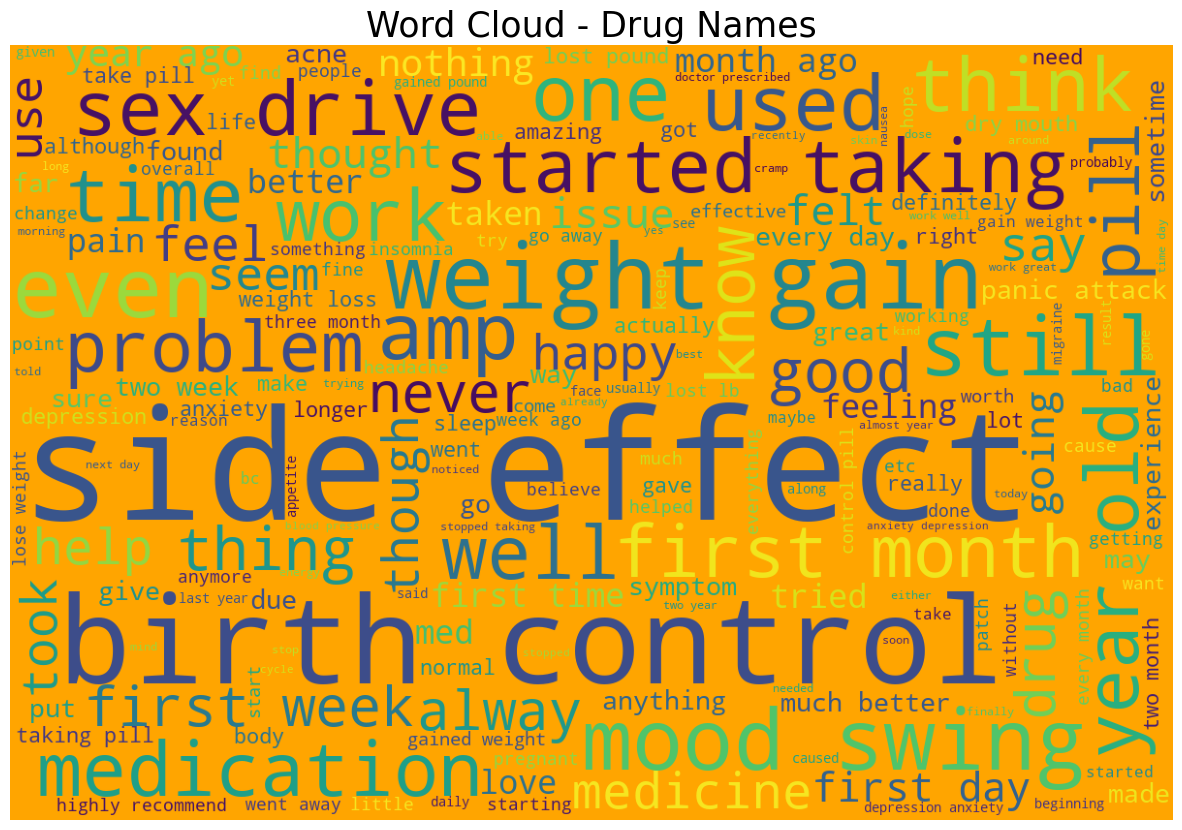

In [31]:
#Wordcloud of Positive Reviews
wordcloud = WordCloud(background_color = 'orange', width = 1200, height = 800).generate(pos_review)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

From above we observe that content of positive emotional inclination is associated mostly with words like birth control or side effect which is somehow controversial. Other words appearing with positive meaning are related to words like good, weight loss, amazing, much better, happy and etc.

## Negative Reviews

In [32]:
#filter only for negative reviews
df_neg_review=df2[df2['sentiment']==0]

In [33]:
#concatenate the review_preprocessed
neg_review=' '.join(df_neg_review['review_preprocessed'])

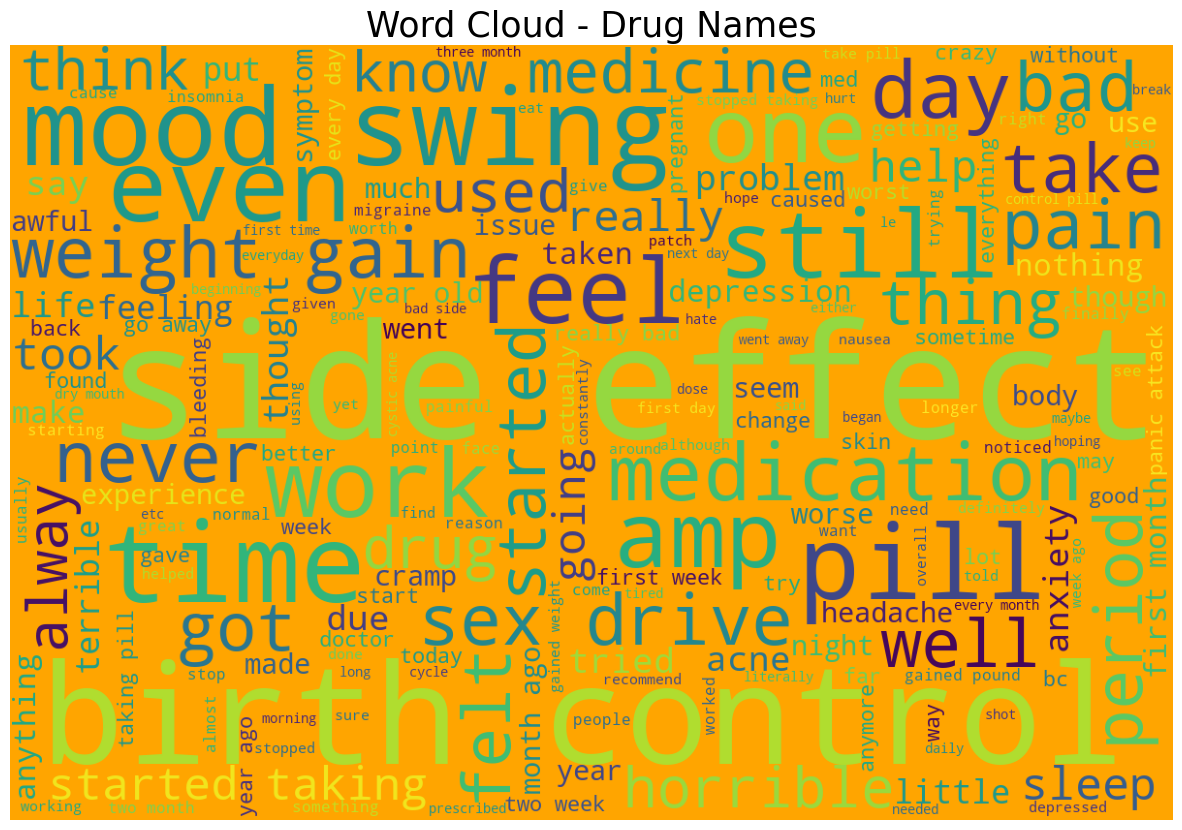

In [34]:
#Wordcloud of Negative Reviews
wordcloud = WordCloud(background_color = 'orange', width = 1200, height = 800).generate(neg_review)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

On the contrary negative content of drug reviews was associated with words like pain, never, weight gain, horrible, depression, mood swing and etc. Again birth control and side effect appear with most frequency.

## Data Preprocessing of Medical Condition

Medical condition consists as one of the primary outputs to perform the second task of predictive modeling must be also transformed into numeric type using the following label transformer:

In [35]:
#label Transformer Initialization
le = preprocessing.LabelEncoder()

In [36]:
#print naive medical condition
print(df2['condition'])

1                    ADHD
2           Birth Control
3           Birth Control
7         Bipolar Disorde
9           Birth Control
               ...       
215053               ADHD
215056      Birth Control
215057      Birth Control
215059            Anxiety
215060      Birth Control
Name: condition, Length: 94960, dtype: object


In [37]:
df2['condition'].value_counts()

Birth Control      37854
Depression         11644
Pain                7445
Anxiety             7403
Acne                7275
Bipolar Disorde     5275
Weight Loss         4680
Obesity             4535
Insomnia            4528
ADHD                4321
Name: condition, dtype: int64

In [38]:
#apply label transformer initialization on naive medical condition
df2['condition']=pd.DataFrame(le.fit_transform(df2['condition']),index=df2.index)

In [39]:
#print medical condition after applied label transformer initialization
print(df2['condition'])

1         0
2         4
3         4
7         3
9         4
         ..
215053    0
215056    4
215057    4
215059    2
215060    4
Name: condition, Length: 94960, dtype: int32


based on the above notice the transformation that adapts, for instance ADHD corresponds to 0, Birth Control to 4, Bipolar Disorder to 3 and so on.

# Section 3: Machine Learning Pipeline

## Prediction of Emotional Inclination of Drug Reviews

In [40]:
#input
X=df2['review_preprocessed']
#output
y=df2['sentiment']

In [41]:
#split train/test set(70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2023)

In [42]:
#set up the evaluation metrics
scorers = {'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score, average = 'macro')}

In [43]:
#Crossvalidation of different Machine Learning Models (Model Selection Process)
def cross_val_ML_models(X, y):
    
    '''
    input:
          X: input matrix
          y: target output
          
    output:
          no output
    '''
    #list of ML models as objects
    ML_models =[LogisticRegression(random_state=2022),RandomForestClassifier(random_state=2022),MultinomialNB()]
    #list of ML models Names as strings 
    labels = ['Logistic Regression', 'Random Forest','Multinomial Naive Bayes']
    for ML_model, label in zip(ML_models, labels): 
        model=Pipeline([
        ('vect',CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('ML_model',ML_model)
        ])
        scores = cross_validate(model, X, y, cv=4, scoring=scorers,return_train_score=True)
        #Print Performance Metrics e.g Accuracy and f1 metrics respectively in test and train
        print ("[%s Performance]: \n Accuracy: %.2f (+/- %.2f), f1: %.2f (+/- %.2f)  [%s] \n Accuracy: %.2f (+/- %.2f), f1: %.2f (+/- %.2f)  [%s]"  %(label,scores['test_accuracy'].mean(), scores['test_accuracy'].std(), scores['test_f1'].mean(), scores['test_f1'].std(), 'test metrics',scores['train_accuracy'].mean(), scores['train_accuracy'].std(), scores['train_f1'].mean(), scores['train_f1'].std(), 'train metrics'))

In [44]:
#results of crossvalidation across the different Machine learning Models
cross_val_ML_models(X_train,y_train)

[Logistic Regression Performance]: 
 Accuracy: 0.93 (+/- 0.00), f1: 0.91 (+/- 0.00)  [test metrics] 
 Accuracy: 0.95 (+/- 0.00), f1: 0.94 (+/- 0.00)  [train metrics]
[Random Forest Performance]: 
 Accuracy: 0.89 (+/- 0.00), f1: 0.87 (+/- 0.00)  [test metrics] 
 Accuracy: 1.00 (+/- 0.00), f1: 1.00 (+/- 0.00)  [train metrics]
[Multinomial Naive Bayes Performance]: 
 Accuracy: 0.71 (+/- 0.00), f1: 0.52 (+/- 0.00)  [test metrics] 
 Accuracy: 0.73 (+/- 0.00), f1: 0.58 (+/- 0.00)  [train metrics]


We observe that all models perform more or less well after observing not moderate discrepancy among training and testing metrics, where always training performance is greater as expected due to larger amount of data. In particlular, the best model performance is obtained under a logistic regression which obtains the highest testing accuracy and f1 metric and exhibits more stable performance between train and test set and for which is obtains the highest testing accuracy and f1 metric. Even though random forest performance exhibits a higher training accuracy with respect to the logistic regression, we will still select the logistic regression due to the higher discrepancy among testing and training of random forest. The worst model performance is observed for multinomial naive Bayes.

In [45]:
#Model Pipeline based on Logistic Regression
model=Pipeline([
('vect',CountVectorizer()),
('tfidf', TfidfTransformer()),
('clf',LogisticRegression(random_state=2022))
])
#train model
model.fit(X_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(random_state=2022))])

Classification of Emotional Inclination 
 [Testing Performance]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      9416
           1       0.92      0.98      0.95     19072

    accuracy                           0.93     28488
   macro avg       0.94      0.91      0.92     28488
weighted avg       0.93      0.93      0.93     28488



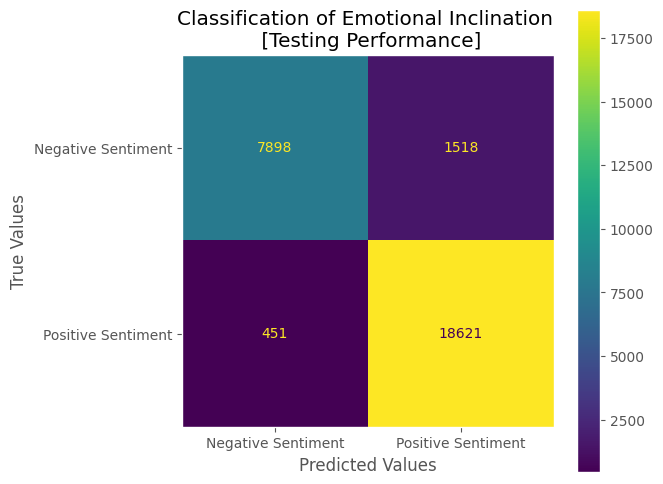

In [46]:
#compute prediction on test set
fig, ax = plt.subplots(figsize=(6,6))
y_pred = model.predict(X_test)
print('Classification of Emotional Inclination \n [Testing Performance]')
print(classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative Sentiment', 'Positive Sentiment'])
cm_display.plot(ax=ax)
plt.title('Classification of Emotional Inclination \n [Testing Performance]')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.grid(False)
plt.show()

Classification of Emotional Inclination 
 [Training Performance]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     21974
           1       0.95      0.99      0.97     44498

    accuracy                           0.95     66472
   macro avg       0.96      0.94      0.95     66472
weighted avg       0.95      0.95      0.95     66472



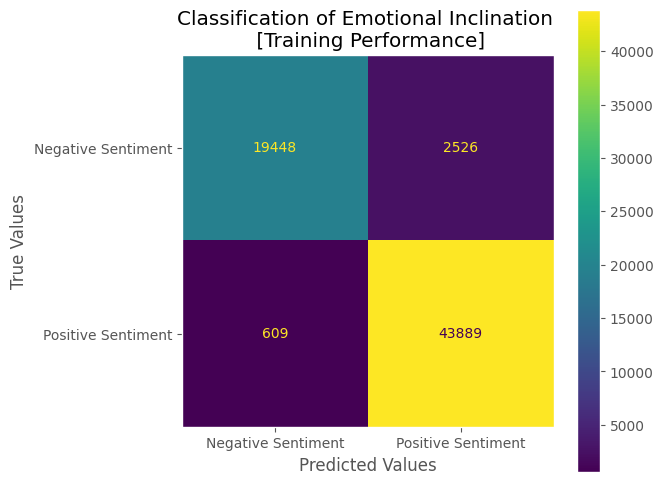

In [47]:
#compute prediction on train set
fig, ax = plt.subplots(figsize=(6,6))
y_pred_train = model.predict(X_train)
print('Classification of Emotional Inclination \n [Training Performance]')
print(classification_report(y_train, y_pred_train))
confusion_matrix = metrics.confusion_matrix(y_train,y_pred_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative Sentiment', 'Positive Sentiment'])
cm_display.plot(ax=ax)
plt.title('Classification of Emotional Inclination \n [Training Performance]')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.grid(False)
plt.show()

## Prediction of Medical Condition of Drug Reviews

In [48]:
#input
X=df2['review_preprocessed']
#output
y=df2['condition']

In [49]:
#split train/test set(70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2023)

Here we redefine the crossvalidation function parsing the OneVsOneClassifier wrapper to perform multiclassification tasks

In [50]:
#Crossvalidation of different Machine Learning Models (Model Selection Process)
def cross_val_ML_models(X, y):
    
    '''
    input:
          X: input matrix
          y: target output
          
    output:
          no output
    '''
    #list of ML models as objects
    ML_models =[OneVsOneClassifier(LogisticRegression(random_state=2022)),OneVsOneClassifier(RandomForestClassifier(random_state=2022)),OneVsOneClassifier(MultinomialNB())]
    #list of ML models Names as strings 
    labels = ['Logistic Regression', 'Random Forest','Multinomial Naive Bayes']
    for ML_model, label in zip(ML_models, labels): 
        model=Pipeline([
        ('vect',CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('ML_model',ML_model)
        ])
        scores = cross_validate(model, X, y, cv=4, scoring=scorers,return_train_score=True)
        #Print Performance Metrics e.g Accuracy and f1 metrics respectively in test and train
        print ("[%s Performance]: \n Accuracy: %.2f (+/- %.2f), f1: %.2f (+/- %.2f)  [%s] \n Accuracy: %.2f (+/- %.2f), f1: %.2f (+/- %.2f)  [%s]"  %(label,scores['test_accuracy'].mean(), scores['test_accuracy'].std(), scores['test_f1'].mean(), scores['test_f1'].std(), 'test metrics',scores['train_accuracy'].mean(), scores['train_accuracy'].std(), scores['train_f1'].mean(), scores['train_f1'].std(), 'train metrics'))

In [51]:
#results of crossvalidation across the different Machine learning Models
cross_val_ML_models(X_train,y_train)

[Logistic Regression Performance]: 
 Accuracy: 0.87 (+/- 0.00), f1: 0.81 (+/- 0.00)  [test metrics] 
 Accuracy: 0.90 (+/- 0.00), f1: 0.87 (+/- 0.00)  [train metrics]
[Random Forest Performance]: 
 Accuracy: 0.89 (+/- 0.00), f1: 0.85 (+/- 0.00)  [test metrics] 
 Accuracy: 1.00 (+/- 0.00), f1: 1.00 (+/- 0.00)  [train metrics]
[Multinomial Naive Bayes Performance]: 
 Accuracy: 0.66 (+/- 0.00), f1: 0.50 (+/- 0.00)  [test metrics] 
 Accuracy: 0.69 (+/- 0.00), f1: 0.56 (+/- 0.00)  [train metrics]


Conclusions are more or less similar regarding multiclassification of medical condition where the model performance among models are more or less the same likewise the case of emotional inclination even though the random forest reaches a slighter higher testing accuracy, thus we end up in both problems with a logistic regression model.

In [52]:
#Model Pipeline based on Logistic Regression for multiclassification tasks
model=Pipeline([
('vect',CountVectorizer()),
('tfidf', TfidfTransformer()),
('clf',OneVsOneClassifier(LogisticRegression(random_state=2022)))
])
#train model
model.fit(X_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 OneVsOneClassifier(estimator=LogisticRegression(random_state=2022)))])

MultiClassification of Medical Condition 
 [Testing Performance]
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1317
           1       0.95      0.89      0.92      2221
           2       0.81      0.72      0.76      2234
           3       0.87      0.70      0.78      1554
           4       0.96      0.98      0.97     11343
           5       0.70      0.87      0.77      3418
           6       0.85      0.84      0.85      1351
           7       0.71      0.63      0.66      1382
           8       0.91      0.92      0.92      2241
           9       0.71      0.68      0.69      1427

    accuracy                           0.87     28488
   macro avg       0.84      0.80      0.82     28488
weighted avg       0.88      0.87      0.87     28488



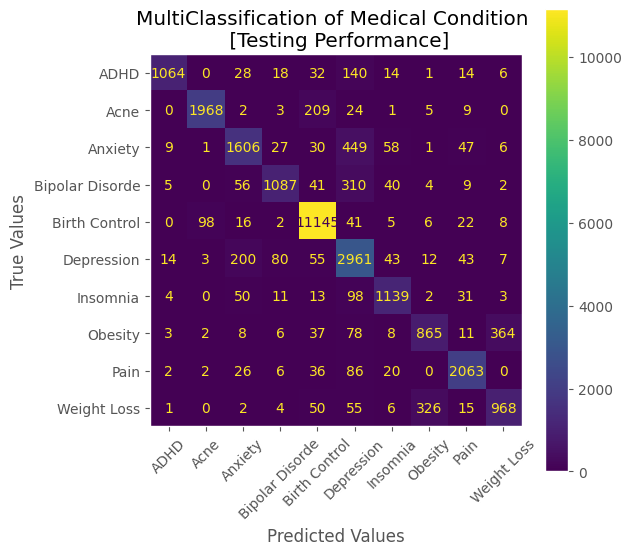

In [53]:
#compute prediction on test set
fig, ax = plt.subplots(figsize=(6,6))
y_pred = model.predict(X_test)
print('MultiClassification of Medical Condition \n [Testing Performance]')
print(classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = le.classes_)
cm_display.plot(ax=ax)
plt.title('MultiClassification of Medical Condition \n [Testing Performance]')
plt.xlabel('Predicted Values')
plt.xticks(rotation=45)
plt.ylabel('True Values')
plt.grid(False)
plt.show()

MultiClassification of Medical Condition 
 [Training Performance]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3004
           1       0.96      0.89      0.92      5054
           2       0.85      0.78      0.82      5169
           3       0.92      0.77      0.84      3721
           4       0.96      0.99      0.98     26511
           5       0.77      0.90      0.83      8226
           6       0.89      0.88      0.88      3177
           7       0.82      0.75      0.78      3153
           8       0.94      0.95      0.94      5204
           9       0.81      0.78      0.79      3253

    accuracy                           0.91     66472
   macro avg       0.89      0.86      0.87     66472
weighted avg       0.91      0.91      0.91     66472



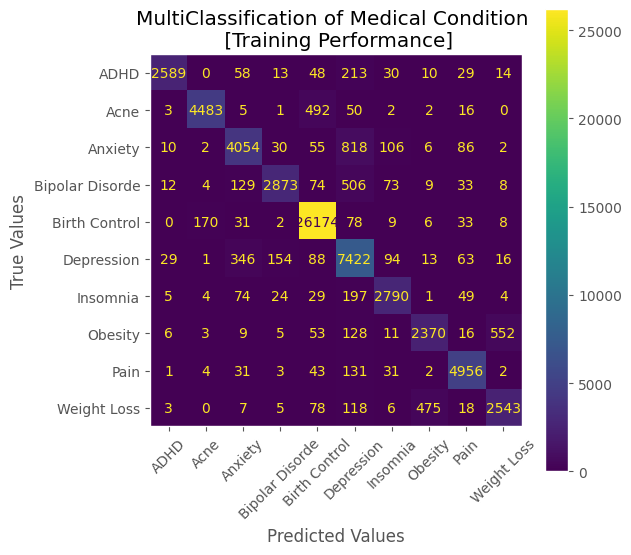

In [54]:
#compute prediction on train set
fig, ax = plt.subplots(figsize=(6,6))
y_pred_train = model.predict(X_train)
print('MultiClassification of Medical Condition \n [Training Performance]')
print(classification_report(y_train, y_pred_train))
confusion_matrix = metrics.confusion_matrix(y_train,y_pred_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = le.classes_)
cm_display.plot(ax=ax)
plt.title('MultiClassification of Medical Condition \n [Training Performance]')
plt.xlabel('Predicted Values')
plt.xticks(rotation=45)
plt.ylabel('True Values')
plt.grid(False)
plt.show()